[Reference](https://medium.com/aimonks/unveiling-the-power-of-graph-embeddings-a-comprehensive-exploration-of-node2vec-f9c54804e17b)

In [2]:
!pip install networkx genism matplotlib

ERROR: Could not find a version that satisfies the requirement genism (from versions: none)
ERROR: No matching distribution found for genism


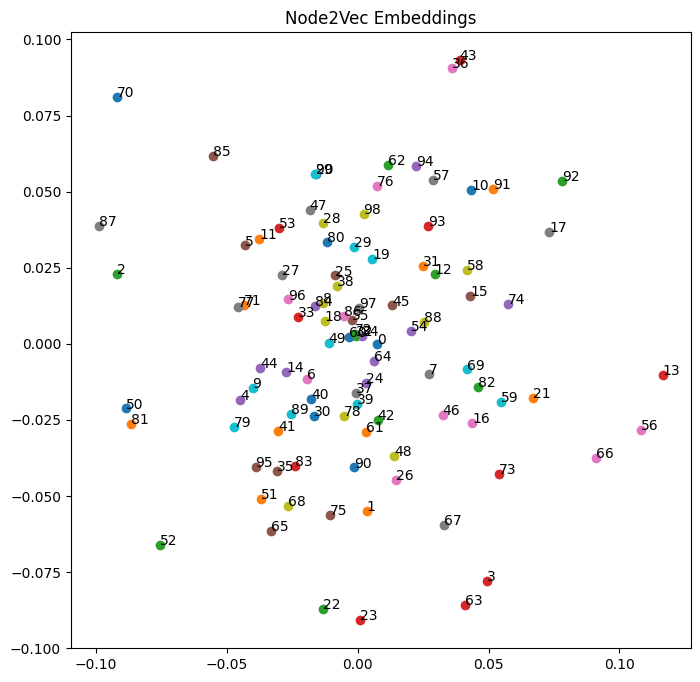

In [3]:
import networkx as nx
from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 2: Create a synthetic graph
G = nx.fast_gnp_random_graph(100, 0.5)  # A random graph with 100 nodes

# Step 3: Apply node2vec
# Perform random walks
def perform_random_walks(G, num_walks, walk_length):
    walks = []
    for node in G.nodes:
        for _ in range(num_walks):
            walk = [node]
            while len(walk) < walk_length:
                cur = walk[-1]
                next_node = np.random.choice(list(G.neighbors(cur)))
                walk.append(next_node)
            walks.append(walk)
    return walks

walks = perform_random_walks(G, num_walks=10, walk_length=10)

# Convert walks to string format for Word2Vec
walks_str = [[str(node) for node in walk] for walk in walks]

# Train Word2Vec model
model = Word2Vec(walks_str, vector_size=20, window=5, min_count=1, sg=1)

# Extract embeddings
node_embeddings = [model.wv[str(node)] for node in G.nodes]

# Step 4: Visualize the embeddings
# Reduce dimensions using PCA
pca = PCA(n_components=2)
node_embeddings_2d = pca.fit_transform(node_embeddings)

# Plot
plt.figure(figsize=(8, 8))
for i, node in enumerate(G.nodes):
    plt.scatter(node_embeddings_2d[i, 0], node_embeddings_2d[i, 1])
    plt.text(node_embeddings_2d[i, 0], node_embeddings_2d[i, 1], str(node))
plt.title('Node2Vec Embeddings')
plt.show()